In [1]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Paths
root = '/media/latlab/MR/projects/kaggle-ubc-ocean'
data_dir = os.path.join(root, 'data')
results_dir = os.path.join(root, 'results')
train_csv = 'train.csv'
train_image_dir = os.path.join(data_dir, 'train_images')
train_thumbnail_dir = os.path.join(data_dir, 'train_thumbnails')
tiles_dir = os.path.join(results_dir, 'train_tiles_2048_p25_p5')

# Load data
df = pd.read_csv(os.path.join(data_dir, train_csv))
df

,image_id,label,image_width,image_height,is_tma
0,4,HGSC,23785,20008,False
1,66,LGSC,48871,48195,False
2,91,HGSC,3388,3388,True
3,281,LGSC,42309,15545,False
4,286,EC,37204,30020,False
...,...,...,...,...,...
533,65022,LGSC,53355,46675,False
534,65094,MC,55042,45080,False
535,65300,HGSC,75860,27503,False
536,65371,HGSC,42551,41800,False


In [2]:
tiles_df = pd.DataFrame(columns=['image_id', 'orig_image_id', 'label', 'is_tma'])
for i, row in df.iterrows():
    orig_image_id = row['image_id']
    try:
        image_id_list = [os.path.splitext(x)[0] for x in os.listdir(os.path.join(tiles_dir, str(orig_image_id)))]
        curr_df = pd.DataFrame({'image_id': image_id_list, 
                                'orig_image_id': orig_image_id, 
                                'label': row['label'], 
                                'orig_image_width': row['image_width'], 
                                'orig_image_height': row['image_height'], 
                                'is_tma': row['is_tma']})
        tiles_df = pd.concat((tiles_df, curr_df))
    except:
        print(f'No tiles for {orig_image_id}')
tiles_df = tiles_df.reset_index(drop=True).astype({'orig_image_width': 'int32', 'orig_image_height': 'int32'})
tiles_df

,image_id,orig_image_id,label,is_tma,orig_image_width,orig_image_height
0,000081_10-7,4,HGSC,False,23785,20008
1,000033_10-3,4,HGSC,False,23785,20008
2,000089_6-8,4,HGSC,False,23785,20008
3,000038_3-4,4,HGSC,False,23785,20008
4,000031_8-3,4,HGSC,False,23785,20008
...,...,...,...,...,...,...
123709,000201_18-9,65533,HGSC,False,45190,33980
123710,000292_17-13,65533,HGSC,False,45190,33980
123711,000129_15-6,65533,HGSC,False,45190,33980
123712,000095_4-5,65533,HGSC,False,45190,33980


In [3]:
# Check data
tiles_df.groupby('orig_image_id')['image_id'].count().describe()

count    538.000000
mean     229.951673
std      132.262821
min        4.000000
25%      128.250000
50%      207.000000
75%      310.750000
max      663.000000
Name: image_id, dtype: float64

In [4]:
tiles_df.to_csv(os.path.join(results_dir, 'train_tiles_2048_p25_p5.csv'), index=False)

In [5]:
# Undersample to ope tile/image
sample_n = 64
def sampler(x, n):
    if len(x) < n:
        return x
    else:
        return x.sample(n)
tiles_df_sample = tiles_df.groupby('orig_image_id').apply(lambda x: sampler(x, sample_n)).reset_index(drop=True)
tiles_df_sample.to_csv(os.path.join(results_dir, f'train_tiles_2048_p25_p5_sample{sample_n}.csv'), index=False)
tiles_df_sample

,image_id,orig_image_id,label,is_tma,orig_image_width,orig_image_height
0,000012_1-2,4,HGSC,False,23785,20008
1,000075_4-7,4,HGSC,False,23785,20008
2,000008_9-1,4,HGSC,False,23785,20008
3,000065_6-6,4,HGSC,False,23785,20008
4,000026_3-3,4,HGSC,False,23785,20008
...,...,...,...,...,...,...
32766,000289_14-13,65533,HGSC,False,45190,33980
32767,000137_23-6,65533,HGSC,False,45190,33980
32768,000222_16-10,65533,HGSC,False,45190,33980
32769,000061_16-3,65533,HGSC,False,45190,33980


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

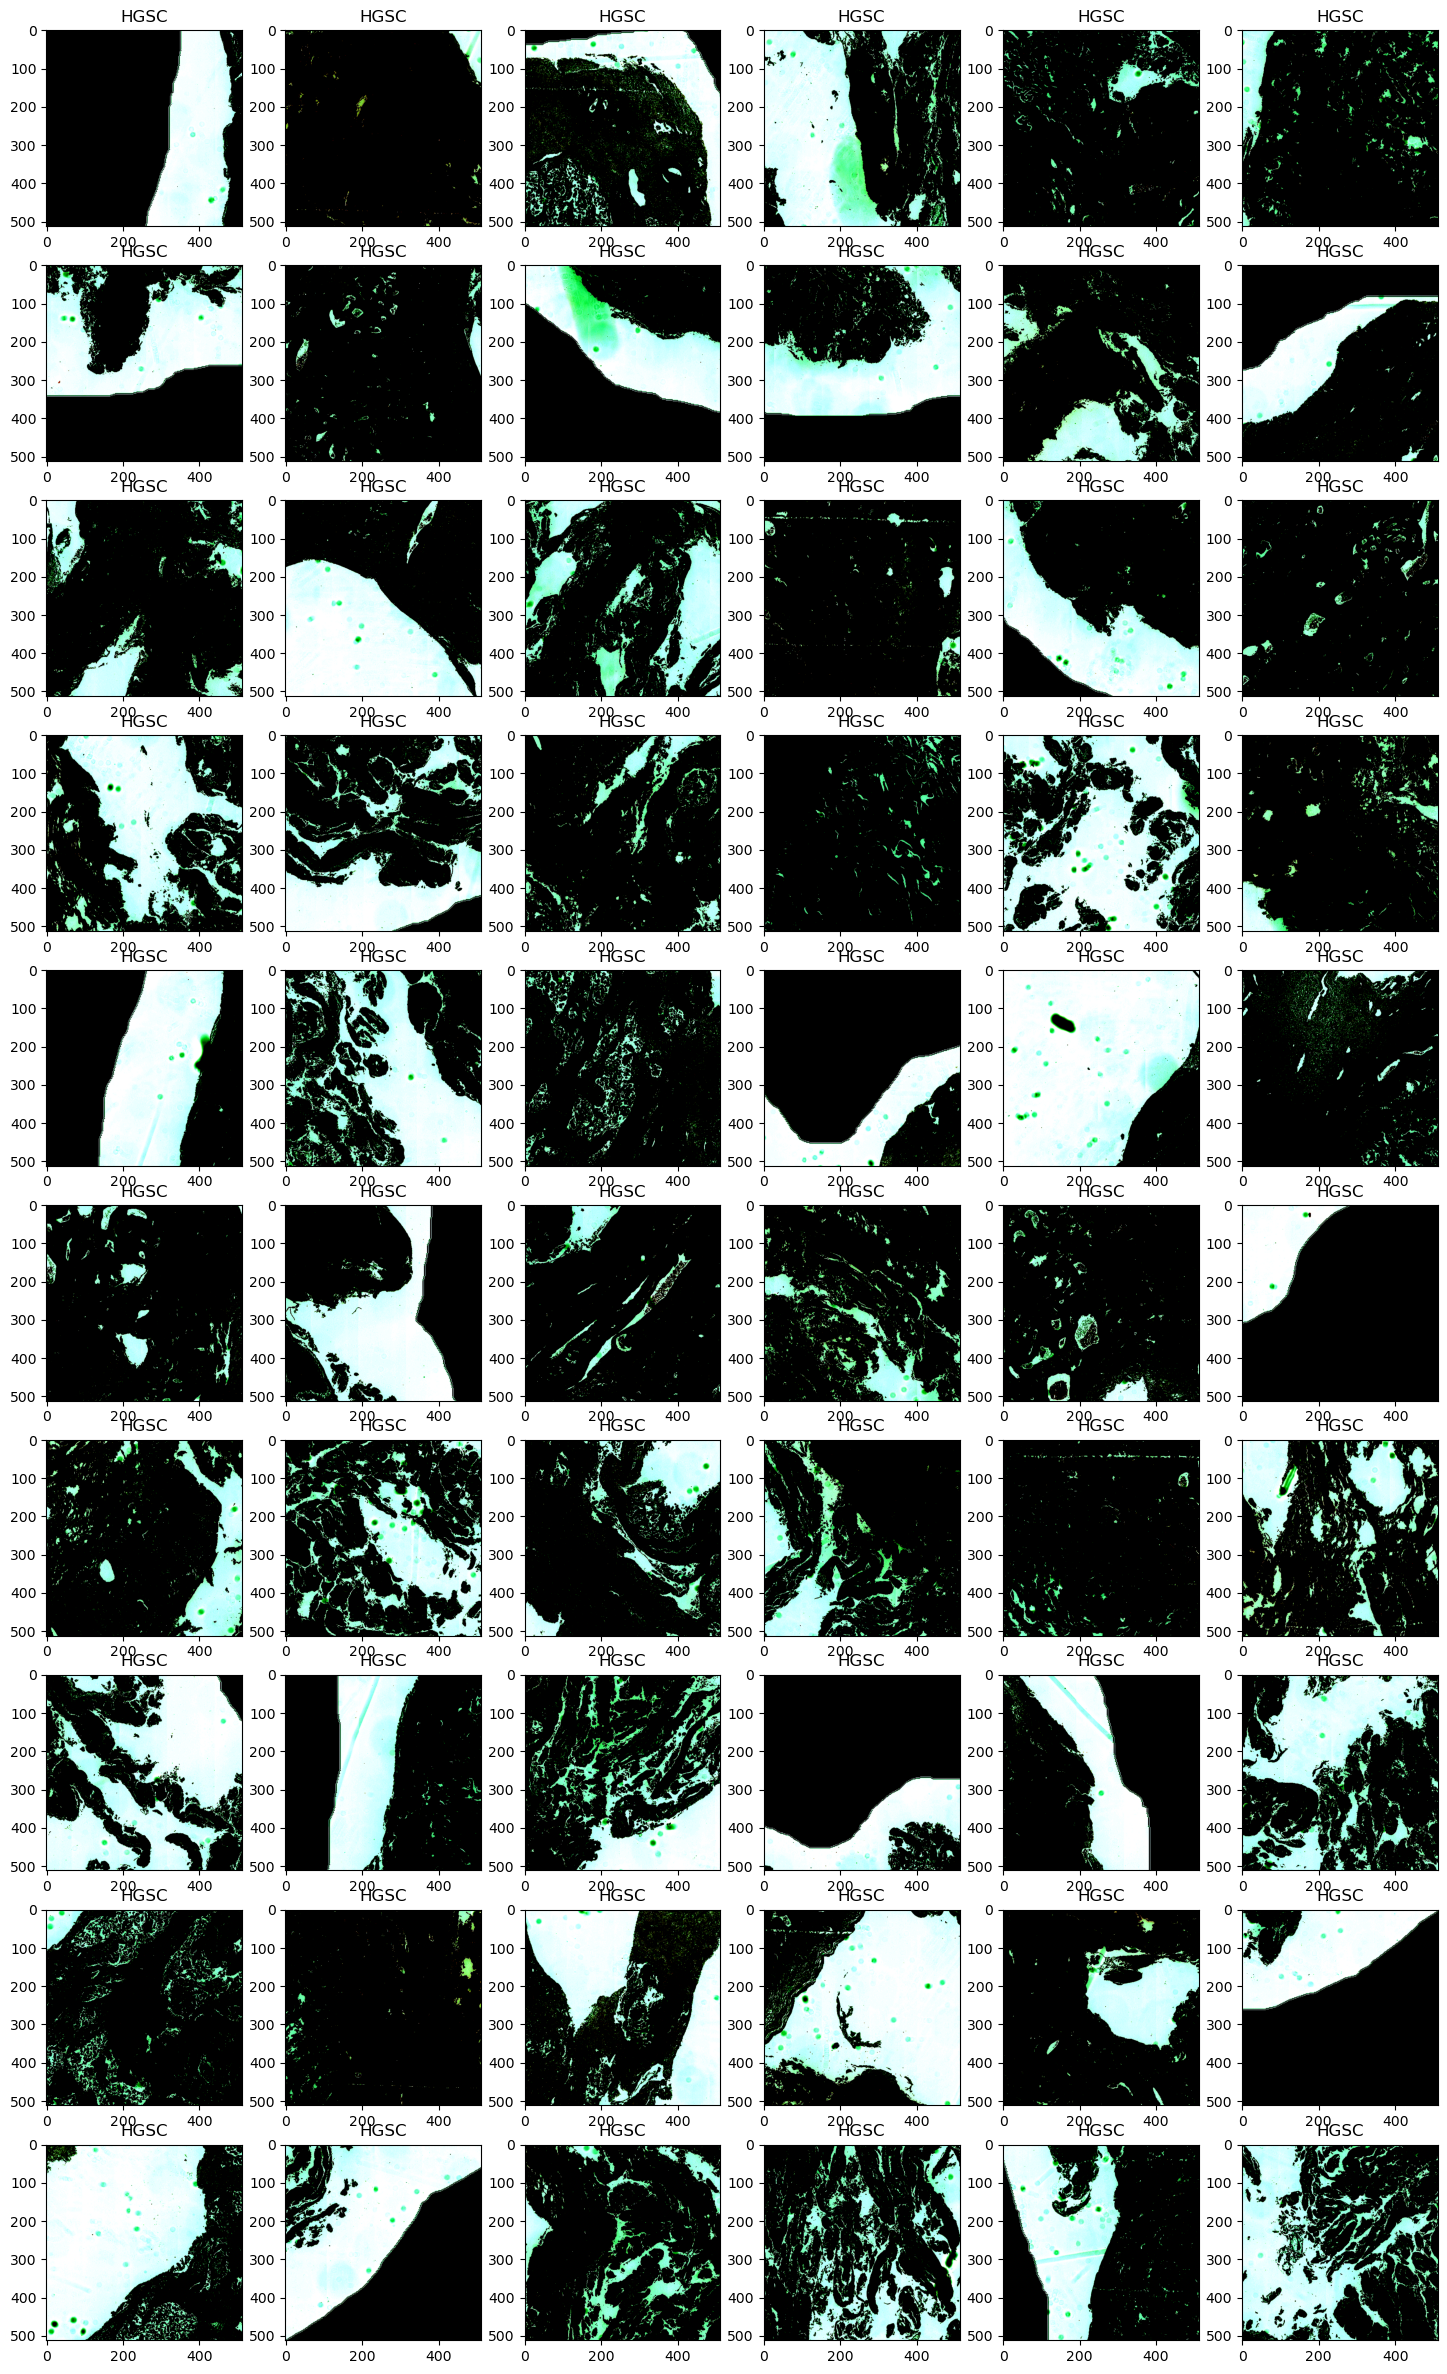

In [6]:
nrows = 10
ncols = 6
img_color_mean = [0.8708488980328596, 0.75677901508938, 0.8545134911215124]
img_color_std = [0.08086288591996027, 0.11553960008706814, 0.06914169213328555]
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*3, nrows*3))
for i, row in tiles_df_sample.iterrows():
    if i >= (nrows*ncols):
        break
    img_path = os.path.join(tiles_dir, str(row['orig_image_id']), str(row['image_id'] + '.png'))
    img = plt.imread(img_path)
    if np.max(img) > 1.5:
        img = img / 255.0
    img -= img_color_mean
    img /= img_color_std
    ax = axes[i // ncols, i % ncols]
    ax.set_title(row['label'])
    ax.imshow(img)